# 1

### Importing all the required libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

### Loading Zoo dataset

In [10]:
zoo = pd.read_csv("E:\\ExcelR\\Assingment\\Assignment 14\\Zoo.csv")
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


### Applying label encoder

In [11]:
le = preprocessing.LabelEncoder()

zoo["animal name"] = le.fit_transform(zoo["animal name"])

In [12]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   animal name  101 non-null    int32
 1   hair         101 non-null    int64
 2   feathers     101 non-null    int64
 3   eggs         101 non-null    int64
 4   milk         101 non-null    int64
 5   airborne     101 non-null    int64
 6   aquatic      101 non-null    int64
 7   predator     101 non-null    int64
 8   toothed      101 non-null    int64
 9   backbone     101 non-null    int64
 10  breathes     101 non-null    int64
 11  venomous     101 non-null    int64
 12  fins         101 non-null    int64
 13  legs         101 non-null    int64
 14  tail         101 non-null    int64
 15  domestic     101 non-null    int64
 16  catsize      101 non-null    int64
 17  type         101 non-null    int64
dtypes: int32(1), int64(17)
memory usage: 13.9 KB


In [13]:
zoo.head(10)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


### Determinig array for Zoo Dataset

In [14]:
array = zoo.values

x = array[:,0:12]
y = array[:,12]

### K- Fold

In [15]:
num_folds = 10
kfold = KFold(n_splits = 10, random_state = 6)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


### Average for our model

In [16]:
model1 = KNeighborsClassifier(n_neighbors = 17)
result1 = cross_val_score(model1, x, y, cv = kfold)

In [17]:
print(result1.mean())

0.8327272727272726


### Grid Search for Algorithm Tuning

In [18]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

In [19]:
model2 = KNeighborsClassifier()

grid = GridSearchCV(estimator = model2, param_grid = param_grid)
grid.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

### Average best score for our model

In [20]:
print(grid.best_score_)

0.8419047619047619


### N- Neighbors for the model

In [21]:
print(grid.best_params_)

{'n_neighbors': 8}


### Visualizing the CV results¶

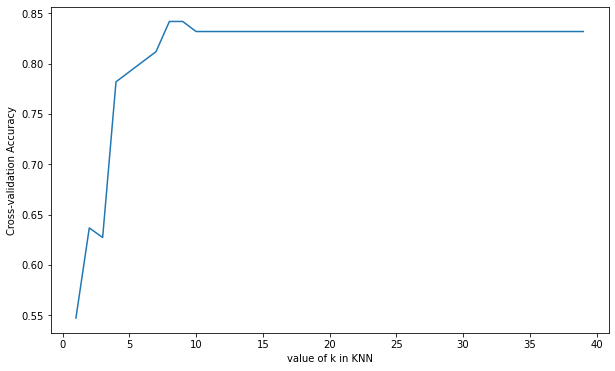

In [22]:
k_range = range(1,40)

k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x, y, cv = 5)
    k_scores.append(scores.mean())

plt.figure(figsize = (10,6))    
plt.plot(k_range, k_scores)
plt.xlabel("value of k in KNN")
plt.ylabel("Cross-validation Accuracy")
plt.show()

# 2

### Loading glass Dataset

In [3]:
glass = pd.read_csv("E:\\ExcelR\\Assingment\\Assignment 14\\glass.csv")
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [7]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


### Determiig array for glass dataset

In [31]:
array1 = glass.values

X = array1[:,0:9]
Y = array1[:,9]

In [36]:
model3 = KNeighborsClassifier(n_neighbors = 17)
result3 = cross_val_score(model3, X, Y, cv = kfold)

In [33]:
print(result3.mean())

0.43311688311688296


### Grid Search for Algorithm Tuning

In [42]:
n_neighbors = np.array(range(1,45))
param_grid = dict(n_neighbors = n_neighbors)

In [45]:
model4 = KNeighborsClassifier()
grid1 = GridSearchCV(estimator = model4, param_grid = param_grid)
grid1.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44])})

### Grid best score for glass array model

In [46]:
print(grid1.best_score_)

0.640531561461794


### N-Neighbors

In [48]:
print(grid1.best_params_)

{'n_neighbors': 1}


### Visualizing the CV results¶

In [50]:
k_range1 = range(1,40)

k_scores1 = []

In [52]:
for i in k_range1:
    knn1 = KNeighborsClassifier(n_neighbors = i)
    scores1 = cross_val_score(knn1, X, Y, cv = 5)
    k_scores1.append(scores1.mean())

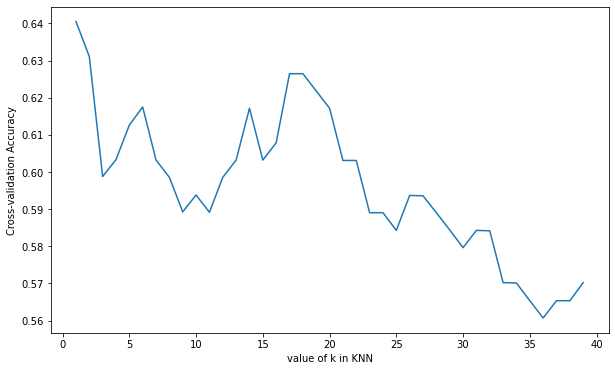

In [53]:
plt.figure(figsize = (10,6))
plt.plot(k_range1, k_scores1)
plt.xlabel("value of k in KNN")
plt.ylabel("Cross-validation Accuracy")
plt.show()